<a href="https://colab.research.google.com/github/Roozbeh-Bazargani/CPSC540-project/blob/main/evaluation/CPSC540_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(1758, 2)
ROC for 4 classes:
              precision    recall  f1-score   support

         0.0       0.49      0.67      0.57       239
         1.0       0.94      0.89      0.92      1518

    accuracy                           0.86      1757
   macro avg       0.72      0.78      0.74      1757
weighted avg       0.88      0.86      0.87      1757

(368,)
AUC0.9008536336624385


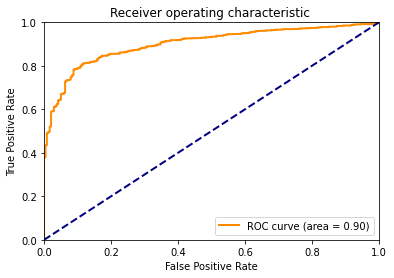

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
test_labels = np.load('/content/epoch5/labelsepoch5.npy')
pred_labels = np.load('/content/epoch5/softmax_outepoch5.npy')
# print(test_labels)
print(pred_labels.shape)

print("ROC for 4 classes:")
## classification report
from sklearn.metrics import classification_report, roc_curve, auc

print(classification_report(test_labels[1:], np.argmax(pred_labels[1:,:], axis = 1)))

## plot AUC
fpr, tpr, _ = roc_curve(test_labels[1:], pred_labels[1:,1]   )

print(np.shape(fpr))
roc_auc= auc(fpr, tpr)
# print(fpr)
print('AUC' + str(roc_auc))

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic ")
plt.legend(loc="lower right")
plt.show()